[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]
-------------------
[0.7625315 0.0184779]


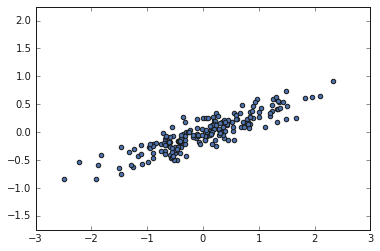

In [75]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

#random data
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')
plt.savefig('pca_1.eps', format='eps', dpi=1000)

#import PCA
from sklearn.decomposition import PCA 
pca = PCA(n_components = 2)
pca.fit(X)


#components and variance learned by the pca fit
print(pca.components_)
print('-------------------')
print(pca.explained_variance_)
plt.savefig('PCA_1.eps', format='eps', dpi=1000)

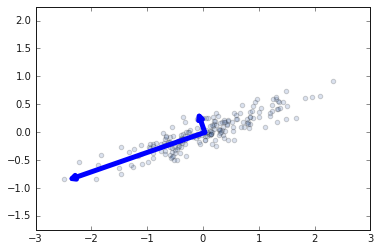

In [78]:
#now, let's draw vectors to visualize this components
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops = dict(arrowstyle='->',
                    linewidth=5, color = 'blue',
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)
    
#plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');
plt.savefig('PCA_2.eps', format='eps', dpi=1000)

original shape:    (200, 2)
transformed shape: (200, 1)


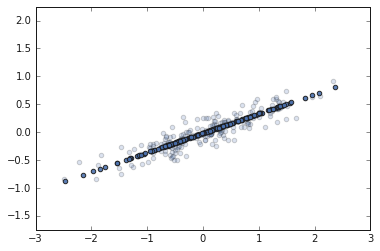

In [80]:
#PCA as dimensionality reduction
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)


X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.9)
plt.axis('equal');
plt.savefig('PCA_3.eps', format='eps', dpi=1000)

explained variance ratio (first two components): [0.92461621 0.05301557]


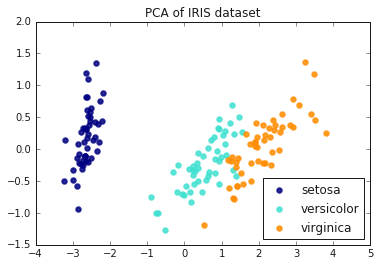

In [73]:
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA

iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')
plt.savefig('PCA_4.eps', format='eps', dpi=1000)